# **PHENOGRAPH TUTORIAL PACKAGE FOR 3D DATA** 

*Made by Pankaj Gupta and Ashli Forbes*

---

The following script is a loose tutorial in how to use PhenoGraph, for more information on what PhenoGraph is and for a more general explanation, please check [here for download](https://pypi.org/project/PhenoGraph/) or [here for a relevant paper](https://pubmed.ncbi.nlm.nih.gov/26095251/).

PhenoGraph is a visualization tool for those wanting to cluster by certain characteristics. A common use is using phenotype and genotype data in labs.

This following tutorial will walk through how to set up and use the basics of PhenoGraph for data analysis in JupyterHub.



## **Setup**

---

**IMPORTANT** When using PhenoGraph and syzygy, it is suggested to use 16 CPU, 32 GB of Ram or more as processing the images and exporting them takes a large amount of computing power and it may be found that running these tasks on personal devices may not be sufficient. 


### Packages Install
The first things one must do is to import the appropriate packages and this is done directly in the script for convience using the !pip and !pip3 commands

In [1]:
!pip install --user --upgrade pip

  Using cached https://files.pythonhosted.org/packages/fe/ef/60d7ba03b5c442309ef42e7d69959f73aacccd0d86008362a681c4698e83/pip-21.0.1-py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip3 install --user pyclustertend
!pip3 install --user pytictoc
!pip3 install --user statannot
!pip3 install --user ffmpeg-python
!pip3 install --user pytransform3d

  Using cached https://files.pythonhosted.org/packages/a3/67/5dd390479122860d3f0ea947e45561c6d4469edf912f8838a4747fe6e189/pyclustertend-1.4.9-py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/17/fa/c60631a899d6bb370f58d4cd95162ec3c204cd3987f2d65bd7c6a3270dd5/pytictoc-1.5.1-py2.py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/0f/3a/e579d7e3b855586e468375251ec093142d67c5f8ccd76482492f2a474862/statannot-0.2.3-py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/d7/0c/56be52741f75bad4dc6555991fabd2e07b432d333da82c11ad701123888a/ffmpeg_python-0.2.0-py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/d2/88/b25778f1

In [3]:
!pip3 install --user git+https://github.com/jacoblevine/phenograph.git

  Cloning https://github.com/jacoblevine/phenograph.git to /tmp/pip-req-build-stx0zjw8
  Running command git clone -q https://github.com/jacoblevine/phenograph.git /tmp/pip-req-build-stx0zjw8
  Created wheel for PhenoGraph: filename=PhenoGraph-1.5.2-cp37-none-any.whl size=149618 sha256=e6b73507b1680676934203886bb95d316f30228066a7965946932cd8524ac559
  Stored in directory: /tmp/pip-ephem-wheel-cache-opl71yq6/wheels/78/4e/51/59f41302009330e31c4a2d0dc1cbbdad17f4379471d40ab9af
Successfully built PhenoGraph
You should consider upgrading via the 'pip install --upgrade pip' command.


### Packages Import

Next you must import a basic set of packages in order to work with PhenoGraph

In [4]:
import os

**Important**

The data path is very important to have correctly and the files in this working example must be in the folder as described in the data path. In this example, the folder name is PhenoGraphTutorial. If there is any additional folders after or before that use the following lines of code

`data_root = os.path.join('..','BeforeFolder','PhenoGraphTutorial')`

`data_root = os.path.join('..','PhenoGraphTutorial','AfterFolder')`

In [5]:
data_root = os.path.join('..','PhenoGraphTutorial')

Begin importing the appropriate packages

In [6]:
import sys
sys.path.append("..")
import numpy as np
import cv2
from skimage.transform import resize
from scipy import ndimage, misc
from scipy.ndimage import gaussian_filter
from scipy import stats,signal,fft
from scipy import io as sio
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.dates import DateFormatter
import matplotlib.patches as patches
import matplotlib.animation as manimation
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import phenograph
import io
import imageio
from IPython.core.debugger import set_trace
from pytictoc import TicToc
from statannot import add_stat_annotation
from pathlib import Path
from numpy import sin, linspace, pi
from pylab import plot, show, title, xlabel, ylabel, subplot
import ffmpeg
from datetime import datetime
import glob
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import multiprocessing as mp
import seaborn as sns
from scipy.spatial import distance
from sklearn import metrics
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from scipy.ndimage import gaussian_filter,gaussian_filter1d
from rigid_transform_3D import rigid_transform_3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from pytransform3d.rotations import *

## Function Definitions

---

The definition of the two functions title function which returns an image as numpy array from figure and are kept in a seperate file for cleaner code.

In [7]:
from FunctionFile import get_img_from_fig
from FunctionFile import plot_dendrogram

## Data Import

### Data Formatting

LD1 .csv files are used in this as demo files. Please replace them with the files that you want to use with PhenoGraph. 

When it comes to the formatting of the csv file, the rows and columns are labelled in pandas starting at 0. 

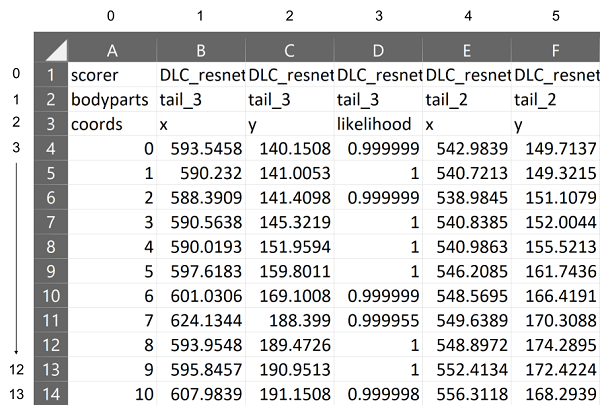

In this example image, the column 0 should be ignored as it is a label and the header should be set to row 3 in order to access the data.

### Code Import

This following code demonstrates the PhenoGraph when only using one file, if there is to be multiple files, use the following code as a template and ass as any files as required.

`data = ['filename1', 'filename2', 'filename3']`

In [8]:
#data_3d is to be used for data that operates in three dimensions
data_3d = ['Sample_Data_3D.csv']

#these arrays are initiated for later use
coords_all_3d = []
dataset_name_3d = []

The csv files are then being read by using the pandas.read_csv method. For a detailed definiton, please see the link provided [here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [9]:
for f_3d in data_3d:
    

    #processing for 3D data
    coords_file = data_root + os.sep + f_3d
    dataset_name_3d = coords_file.split('/')[-1].split('.')[0]
    
    #pandas read_csv method
    coords_3d = pd.read_csv(coords_file, header=3)
    
    #excluding columns and csv specific edits
    coords_3d = coords_3d.values[:, 1:] #exclude the index column
    coords_3d = np.around(coords_3d.astype('float'), 2) #round to two decimal places 
    
    #final step after all edits
    coords_all_3d.append(coords_3d)


In [11]:
# %%
coords_all_3d = np.vstack(coords_all_3d)
x_3d = coords_all_3d[:, ::3];        y_3d = coords_all_3d[:, 1::3];        z_3d = coords_all_3d[:, 2::3];

k=30 # K for k-means step of phenograph
communities_3d, graph, Q = phenograph.cluster(coords_all_3d, k=k)
n_clus_3d = np.unique(communities_3d).shape[0]

#communities is the row and cluster number list (FIND A WAY TO PRINT THIS)

hopkins(coords_all_3d, coords_all_3d.shape[0])

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.42235708236694336 seconds
Jaccard graph constructed in 0.5796334743499756 seconds
Wrote graph to binary file in 0.39217495918273926 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.822671
After 2 runs, maximum modularity is Q = 0.825181
Louvain completed 22 runs in 1.4252538681030273 seconds
PhenoGraph complete in 2.840284824371338 seconds


0.13642204645593026

## Data Plotting

---

The following code is what plots the the loaded data and then saves it the appropriate file.  

Here is a [link](https://www.example.com) that dives deeper into TSNE and its explanation.

Perplexity is an important parameter. Reference original paper.

Enter the desired name for the image here in a string format. If a file of this name already exists in the folder where this notebook is running, the rest of the code will not execute.

In [12]:
image_name_3d = 'syn_3d_tsne3.png'

In [13]:
# %%
tsne_model = TSNE(n_components=2, random_state=2,perplexity=100,angle=0.1,init='pca')

In [14]:
# %% tSNE plot of 3d data labeled by phenograph clusters

#this if not statement checks if the .png file already exists are not, if it does, the rest of this code will not execute
if not os.path.exists(image_name_3d):
    # tsne_model = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0,
    #                   learning_rate=20.0, n_iter=1000, n_iter_without_progress=300,
    #                   min_grad_norm=1e-07, metric='euclidean', init='random',
    #                   verbose=0, random_state=None, method='barnes_hut',
    #                   angle=0.5)
    # tsne_model = TSNE(n_components=2,perplexity=30,random_state=0)
    
    
    # If using more than one data file, use the upper line of code, the one that refers to n_jobs.
    # When using one data file, use the lower line of code.
    
    #tsne_model = TSNE(n_components=2, random_state=2,perplexity=100,angle=0.1,init='pca',n_jobs= mp.cpu_count()-1)
    tsne_model = TSNE(n_components=2, random_state=2,perplexity=100,angle=0.1,init='pca')
    
    Y = tsne_model.fit_transform(coords_all_3d)
    
    cmap = plt.cm.colors.ListedColormap(plt.cm.jet(np.linspace(0,1,n_clus_3d)))

This is the plotting code for 3D data. Please refer to comments to change titles, labels and colours.

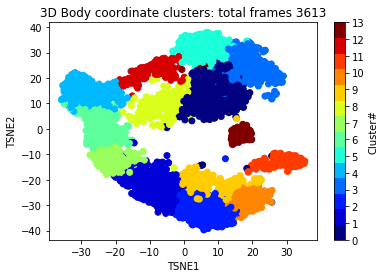

In [15]:
if not os.path.exists(image_name_3d):
    
    plt.figure()

    #the plot type, in this example it is of plot type scatter
    plt.scatter(Y[:,0], Y[:,1],c=communities_3d, cmap=cmap, alpha=1.0)
    
    #the plot colour bar and label
    plt.colorbar(ticks=np.unique(communities_3d), label='Cluster#')
    
    #the plot labels, change the characters in the string (letters in red) to then edit the axis labels
    plt.xlabel('TSNE1'); plt.ylabel('TSNE2')
    
    #the plot title in a string format
    plt.title('3D Body coordinate clusters: total frames ' + str(len(communities_3d)))
    
    #the file name and format that the plot is saved in
    plt.savefig(image_name_3d, format='png')
    plt.show(block=False)
    plt.close()